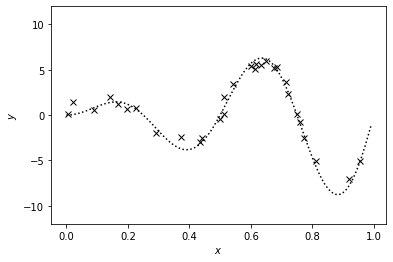

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

X_star = np.arange(0, 1, 0.01)
# データ点の個数
n_points = 30
# データを生成する真の分布
f = lambda x: 10 * x * np.sin(4 * np.pi * x)
# データ点の横軸
X = np.sort(np.random.random(size=n_points))
# ノイズを加えたものを報酬(観測値)とする
r = f(X) + np.random.normal(0, 1, size=n_points)
plt.ylim(-12, 12)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.plot(X, r, 'x', color='black')
plt.show()

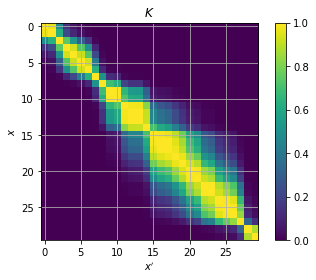

In [3]:
def gaussian_kernel(x1, x2, gamma=100):
  # RBFカーネル
  return np.exp(-gamma * (x1 - x2)**2)

K = np.zeros((len(X), len(X)))
for i, xi in enumerate(X):
  for j, xj in enumerate(X):
    K[i, j] = gaussian_kernel(xi, xj)

plt.xlabel(r'$x^{\prime}$')
plt.ylabel(r'$x$')
plt.title(r'$K$')
plt.imshow(K)
plt.colorbar()
plt.grid(None)
plt.show()

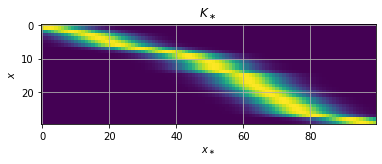

In [4]:
K_star = np.zeros((len(X), len(X_star)))
for i, xi in enumerate(X):
  for j, xj_star in enumerate(X_star):
    K_star[i, j] = gaussian_kernel(xi, xj_star)
plt.xlabel(r'$x_\ast$')
plt.ylabel(r'$x$')
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.grid(None)
plt.show()

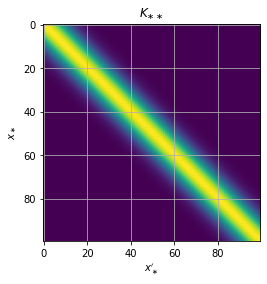

In [5]:
K_starstar = np.zeros((len(X_star), len(X_star)))
for i, xi_star in enumerate(X_star):
  for j, xj_star in enumerate(X_star):
    K_starstar[i, j] = gaussian_kernel(xi_star, xj_star)
plt.xlabel(r'$x_\ast^{\prime}$')
plt.ylabel(r'$x_\ast$')
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)
plt.grid(None)
plt.show()

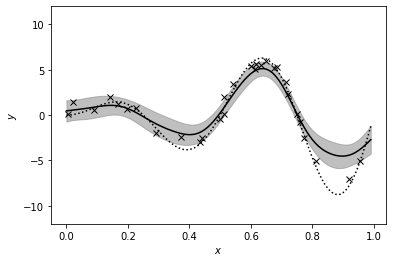

In [6]:
# 事前分布の分散は1とする
s = 1
A = np.linalg.inv(K + s * np.eye(K.shape[0]))
mu = np.dot(np.dot(K_star.T, A), r)
sigma = K_starstar - np.dot(np.dot(K_star.T, A), K_star)
plt.ylim(-12, 12)
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.fill_between(X_star, mu - 2 * np.sqrt(np.diag(sigma)),
    mu + 2 * np.sqrt(np.diag(sigma)), alpha=0.5, color='gray')
plt.plot(X_star, mu, color='black')
plt.plot(X, r, 'x', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

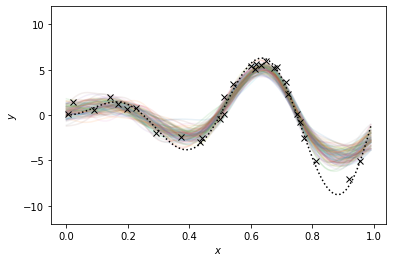

In [7]:
plt.ylim(-12, 12)
for _ in range(100):
  plt.plot(X_star, np.random.multivariate_normal(mu, sigma), alpha=0.1)
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.plot(X, r, 'x', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

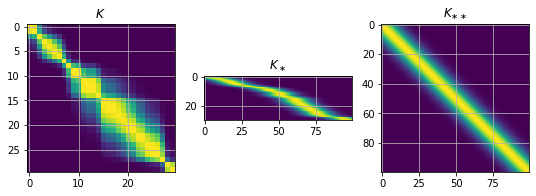

In [8]:
gamma = 100
X = np.expand_dims(X, 0)
X_star = np.expand_dims(X_star, 0)
Q = np.dot(X.T, X)
Q_star = np.dot(X.T, X_star)
Q_starstar = np.dot(X_star.T, X_star)

# diagで対角成分を取り出す
# tille
K = np.exp(-gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
K_star = np.exp(-gamma * (np.tile(np.diag(Q), (X_star.shape[1], 1)).T  - 2 * Q_star + np.tile(np.diag(Q_starstar), (X.shape[1], 1))))
K_starstar = np.exp(-gamma * (
    np.tile(np.diag(Q_starstar), (X_star.shape[1], 1)).T
    - 2 * Q_starstar
    + np.tile(np.diag(Q_starstar), (X_star.shape[1], 1))))

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.title(r'$K$')
plt.imshow(K)
plt.grid(None)
plt.subplot(1, 3, 2)
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.grid(None)
plt.subplot(1, 3, 3)
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)
plt.grid(None)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


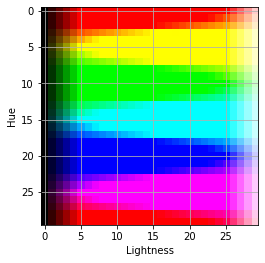

In [13]:
import colorsys

N = 30
X_im = np.zeros((N, N, 2))
rs = []
xs = []
for i in range(N):
  for j in range(N):
    X_im[i, j, 0] = i / N  # Hue
    X_im[i, j, 1] = j / N  # Lightness
# h, l, s
hl_to_rgb = lambda x: colorsys.hls_to_rgb(x[0], x[1], 5)
# apply_along_axis(function, axis(-1は3次元以上の場合), nd.array)
X_rgb = np.apply_along_axis(hl_to_rgb, -1, X_im)
plt.imshow(X_rgb)
plt.grid(None)
plt.xlabel('Lightness')
plt.ylabel('Hue')
plt.show()

In [14]:
print(X_im)

[[[0.         0.        ]
  [0.         0.03333333]
  [0.         0.06666667]
  ...
  [0.         0.9       ]
  [0.         0.93333333]
  [0.         0.96666667]]

 [[0.03333333 0.        ]
  [0.03333333 0.03333333]
  [0.03333333 0.06666667]
  ...
  [0.03333333 0.9       ]
  [0.03333333 0.93333333]
  [0.03333333 0.96666667]]

 [[0.06666667 0.        ]
  [0.06666667 0.03333333]
  [0.06666667 0.06666667]
  ...
  [0.06666667 0.9       ]
  [0.06666667 0.93333333]
  [0.06666667 0.96666667]]

 ...

 [[0.9        0.        ]
  [0.9        0.03333333]
  [0.9        0.06666667]
  ...
  [0.9        0.9       ]
  [0.9        0.93333333]
  [0.9        0.96666667]]

 [[0.93333333 0.        ]
  [0.93333333 0.03333333]
  [0.93333333 0.06666667]
  ...
  [0.93333333 0.9       ]
  [0.93333333 0.93333333]
  [0.93333333 0.96666667]]

 [[0.96666667 0.        ]
  [0.96666667 0.03333333]
  [0.96666667 0.06666667]
  ...
  [0.96666667 0.9       ]
  [0.96666667 0.93333333]
  [0.96666667 0.96666667]]]


In [15]:
X_star = X_im.reshape((N * N, 2)).T

class GPUCBAgent(object):
  def __init__(self):
    self.xs = []
    self.rs = []
    self.gamma = 10
    self.s = 0.5
    self.alpha = 2
    self.Q_starstar = X_star.T.dot(X_star)
    self.K_starstar = np.exp(-self.gamma * (
        np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1)).T
        - 2 * self.Q_starstar
        + np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1))))
    self.mu = np.zeros(self.K_starstar.shape[0])
    self.sigma = self.K_starstar

  def get_arm(self):
    ucb = self.mu + self.alpha * np.diag(self.sigma)
    return X_star[:, np.argmax(ucb)], ucb

  def sample(self, x, r):
    self.xs.append(x)
    self.rs.append(r)
    X = np.array(self.xs).T

    Q = X.T.dot(X)
    Q_star = X.T.dot(X_star)
    K = np.exp(-self.gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T
        - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
    K_star = np.exp(-self.gamma * (
        np.tile(np.diag(Q), (X_star.shape[1], 1)).T
        - 2 * Q_star
        + np.tile(np.diag(self.Q_starstar), (X.shape[1], 1))))
    A = np.linalg.inv(self.s + np.identity(K.shape[0]) + K)
    self.mu = K_star.T.dot(A).dot(self.rs)
    self.sigma = self.K_starstar - K_star.T.dot(A).dot(K_star)

In [16]:
from mpl_toolkits.axes_grid1 import ImageGrid
def visualize(agent, x, f):
  vmax = 1.6
  vmin = -1.6
  contour_linewidth = 0.6
  contour_fontsize = 6
  contour_levels = np.linspace(-2, 2, 17)
  fig = plt.figure()
  grid = ImageGrid(fig, 211, nrows_ncols=(1, 2), axes_pad=0.1)
  grid[0].imshow(X_rgb)
  cs = grid[0].contour(f.reshape(N, N), levels=contour_levels,
      colors='white', linewidths=contour_linewidth)
  grid[0].clabel(cs, inline=1, fontsize=contour_fontsize)
  grid[0].plot(x[1] * N, x[0] * N, '*', markersize=20, color='yellow',
      markeredgecolor='black')
  grid[0].set_title('Solution space')
  grid[0].set_xticklabels([])
  grid[0].set_yticklabels([])
  grid[1].imshow(np.tile(hl_to_rgb(x), (N, N, 1)))
  grid[1].set_title('Proposed color')
  grid[1].set_xticklabels([])
  grid[1].set_yticklabels([])
  grid = ImageGrid(fig, 212, nrows_ncols=(1, 3), axes_pad=0.2,
      share_all=True, label_mode='L', cbar_location='left',
      cbar_mode='single')
  im = grid[0].imshow(agent.mu.reshape(N, N), vmin=vmin, vmax=vmax)
  cs = grid[0].contour(agent.mu.reshape(N, N), levels=contour_levels,
      colors='white', linewidths=contour_linewidth)
  grid[0].clabel(cs, inline=1, fontsize=contour_fontsize)
  grid[0].set_title(r'$\mu$')
  grid.cbar_axes[0].colorbar(im)
  grid[1].imshow(np.diag(agent.sigma).reshape(N, N),
      vmin=vmin, vmax=vmax)
  cs = grid[1].contour(np.diag(agent.sigma).reshape(N, N),
      levels=contour_levels, colors='white',
      linewidths=contour_linewidth)
  grid[1].set_title(r'$diag(\Sigma)$')
  grid[1].clabel(cs, inline=1, fontsize=contour_fontsize)
  grid[2].imshow(f.reshape(N, N), vmin=vmin, vmax=vmax)
  cs = grid[2].contour(f.reshape(N, N), levels=contour_levels,
      colors='black', linewidths=contour_linewidth)
  grid[2].clabel(cs, inline=1, fontsize=contour_fontsize)
  grid[2].set_title('Acquisition function')
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.

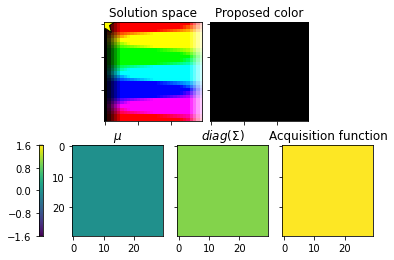

In [17]:
agent = GPUCBAgent()
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


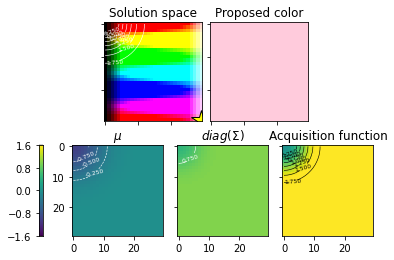

In [19]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


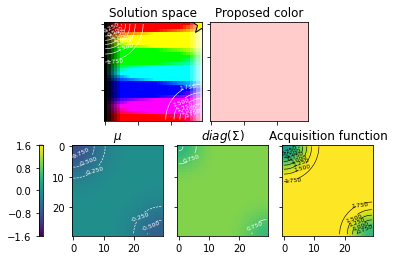

In [20]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


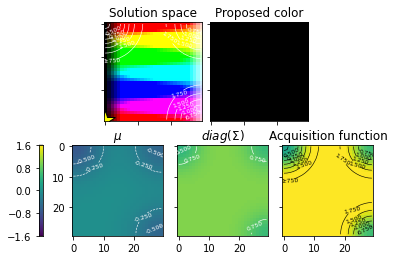

In [21]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


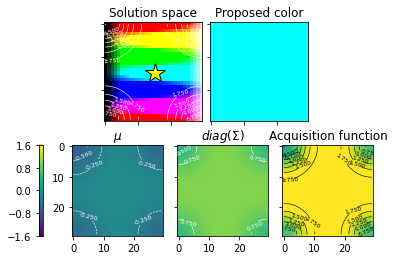

In [22]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


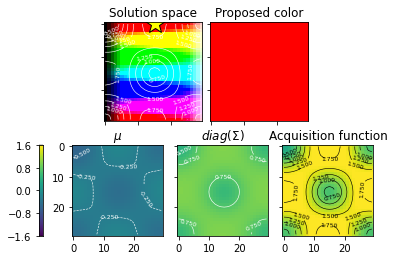

In [23]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


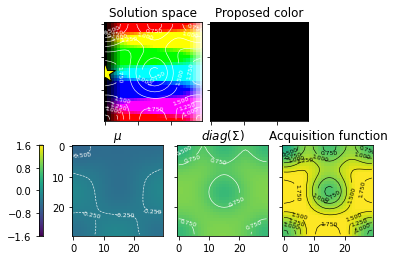

In [24]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


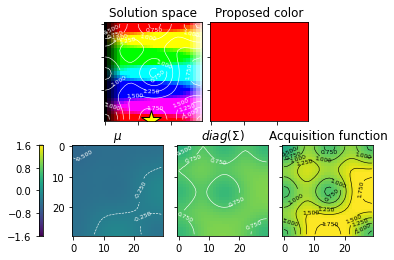

In [25]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


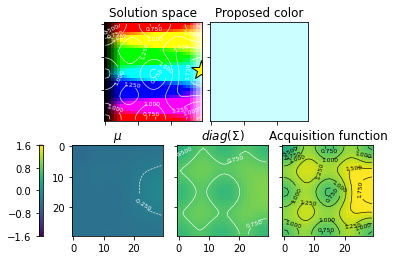

In [26]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


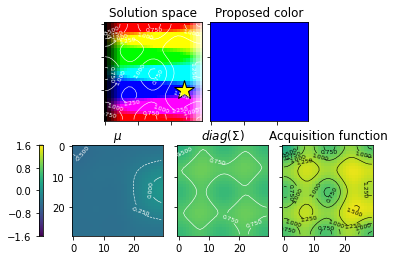

In [27]:
agent.sample(x, -1)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


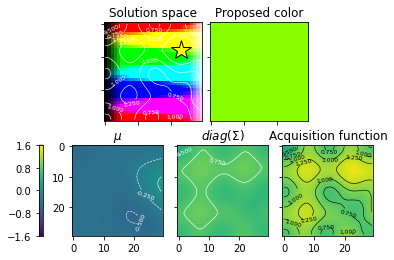

In [28]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


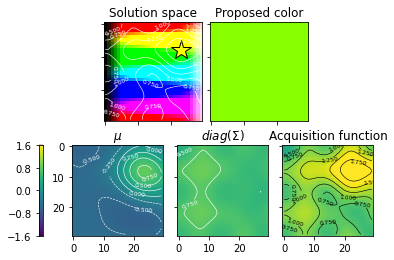

In [29]:
agent.sample(x, 1)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


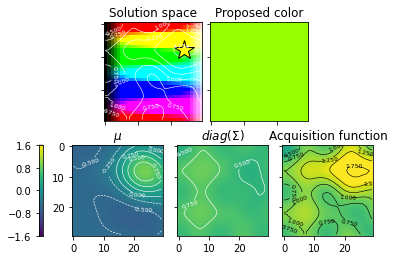

In [30]:
agent.sample(x, 0)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

In [31]:
class GPTSAgent(object):
  def __init__(self):
    self.xs = []
    self.rs = []
    self.gamma = 10
    self.s = 0.5
    self.Q_starstar = X_star.T.dot(X_star)
    self.K_starstar = np.exp(-self.gamma * (
        np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1)).T
        - 2 * self.Q_starstar
        + np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1))))
    self.mu = np.zeros(self.K_starstar.shape[0])
    self.sigma = self.K_starstar

  def get_arm(self):
    f = np.random.multivariate_normal(self.mu, self.sigma)
    return X_star[:, np.argmax(f)], f

  def sample(self, x, r):
    self.xs.append(x)
    self.rs.append(r)
    X = np.array(self.xs).T

    Q = X.T.dot(X)
    Q_star = X.T.dot(X_star)
    K = np.exp(-self.gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T
        - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
    K_star = np.exp(-self.gamma * (
        np.tile(np.diag(Q), (X_star.shape[1], 1)).T
        - 2 * Q_star
        + np.tile(np.diag(self.Q_starstar), (X.shape[1], 1))))
    A = np.linalg.inv(self.s + np.identity(K.shape[0]) + K)
    self.mu = K_star.T.dot(A).dot(self.rs)
    self.sigma = self.K_starstar - K_star.T.dot(A).dot(K_star)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.


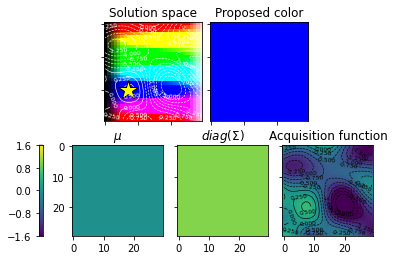

In [32]:
agent = GPTSAgent()
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


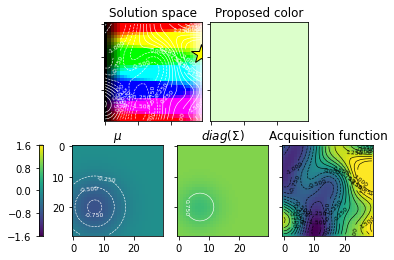

In [33]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


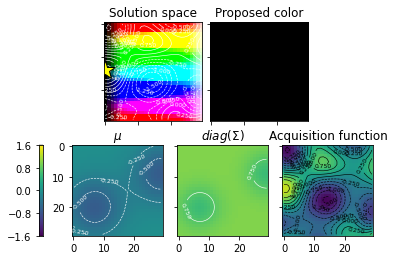

In [34]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


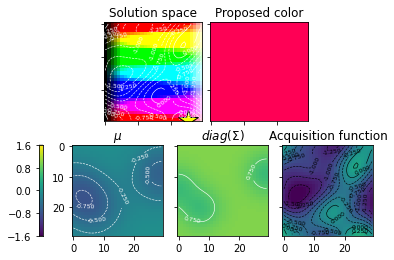

In [35]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


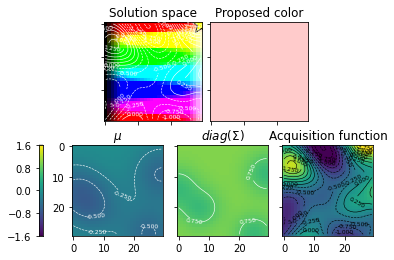

In [36]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


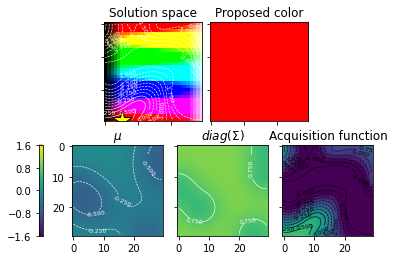

In [37]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


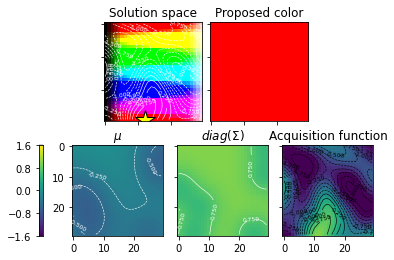

In [38]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


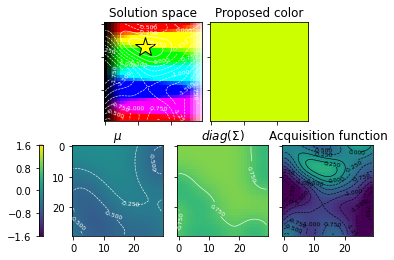

In [39]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


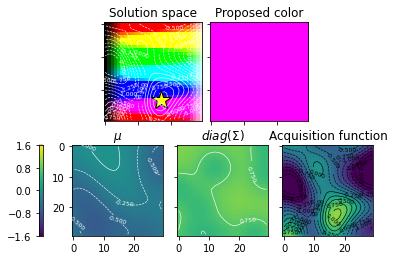

In [40]:
agent.sample(x, -1)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


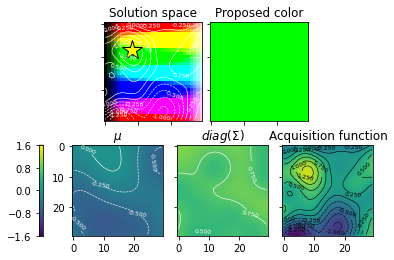

In [41]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


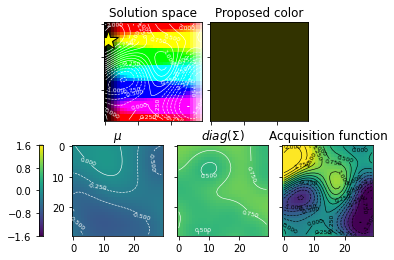

In [42]:
agent.sample(x, -1)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


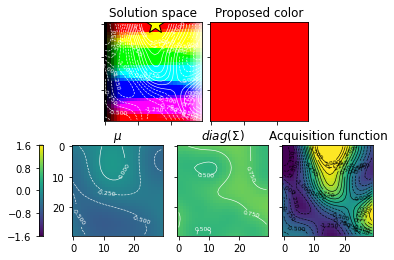

In [43]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


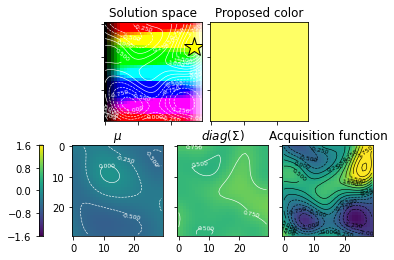

In [44]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


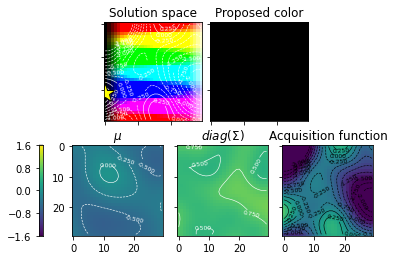

In [45]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


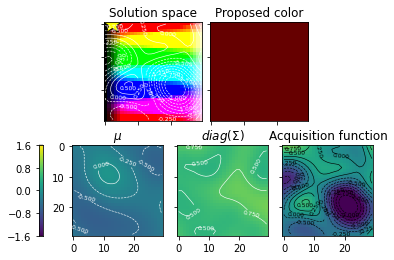

In [46]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


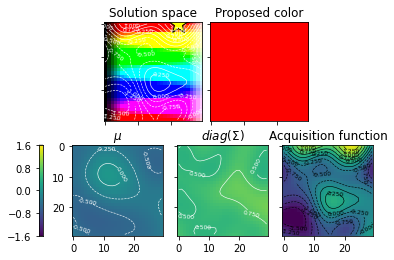

In [47]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


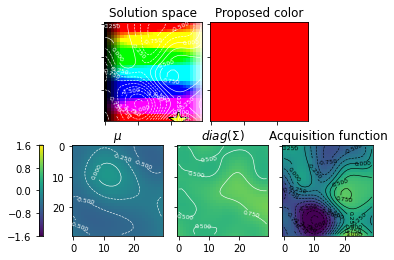

In [48]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


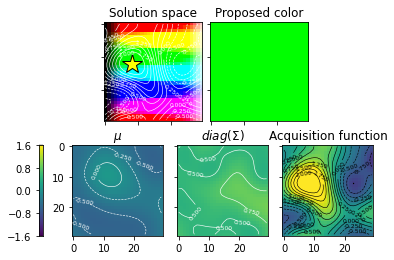

In [49]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


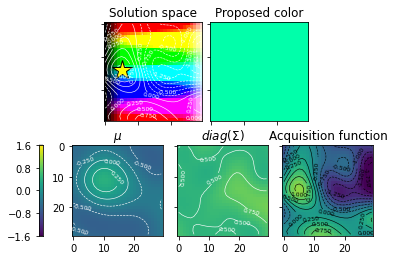

In [50]:
agent.sample(x, 0)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


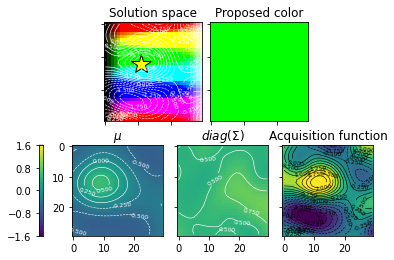

In [51]:
agent.sample(x, 0)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


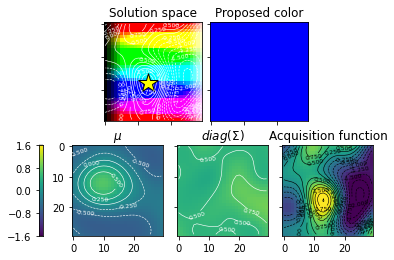

In [52]:
agent.sample(x, 0)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


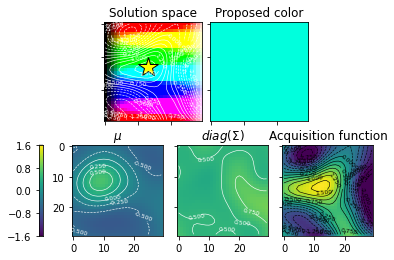

In [53]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


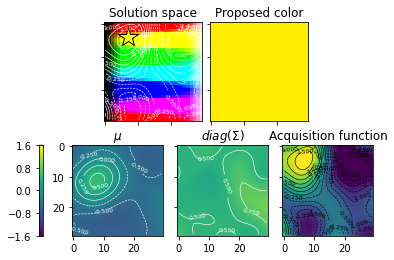

In [54]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


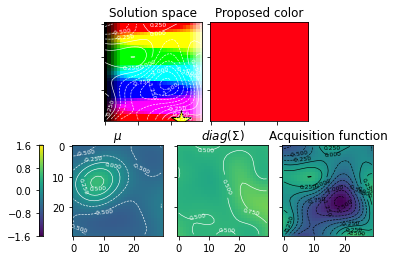

In [55]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


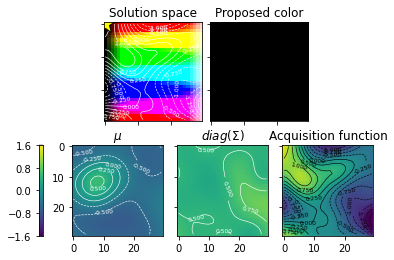

In [56]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


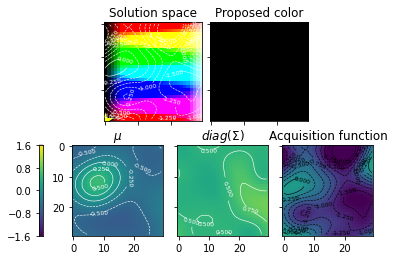

In [57]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


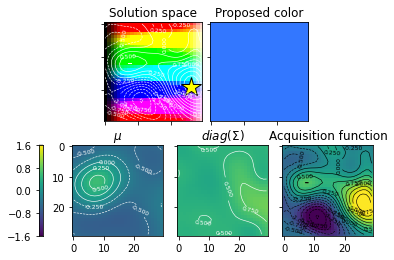

In [58]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


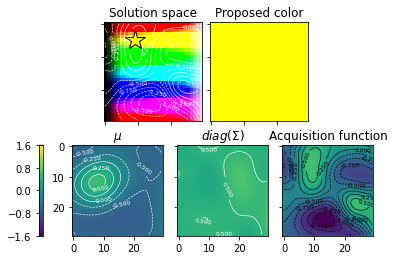

In [59]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


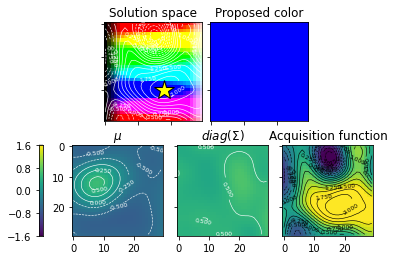

In [60]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


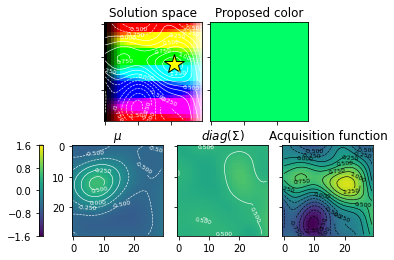

In [61]:
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)